<a href="https://colab.research.google.com/github/laugustovieira/Soro_Anti_Escorpionico/blob/main/noteboocks/soro_anti_escorpionico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar Bibliotecas necessárias para análise


In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carregando arquivos para análise

In [179]:
dados_regiao = pd.read_csv("https://raw.githubusercontent.com/laugustovieira/Soro_Anti_Escorpionico/main/Dados/SoroAntiEscorpi%C3%B4nicoRegi%C3%B5es.csv",
                           encoding="ISO-8859-1", sep=";", skipfooter=1, engine ="python", thousands= ".", decimal=",")


#Tratar dados

In [180]:
#definindo cores
colors2 = {
'31 Minas Gerais': '#E00000', '15 Pará': '#E05200', '29 Bahia': '#E0A100', '32 Espírito Santo': '#E0CA00',
 '35 São Paulo': '#7FE000', '51 Mato Grosso': '#00E0B7', '22 Piauí': '#00BBE0', '16 Amapá': '#008AE0',
 '21 Maranhão': '#8700E0', '33 Rio de Janeiro': '#BB00E0', '52 Goiás': '#E0008E', '17 Tocantins': '#9D4343',
 '27 Alagoas': '#9D8E43', '13 Amazonas': '#5B9D43', '28 Sergipe': '#439D88', '26 Pernambuco': '#CE9F69',
 '11 Rondônia': '#B8CE69', '23 Ceará': '#69CE82', '25 Paraíba': '#9B7DBA', '50 Mato Grosso do Sul': '#B2A2C3',
 '41 Paraná': '#575757', '24 Rio Grande do Norte': '#693535', '53 Distrito Federal': '#762828', '42 Santa Catarina': '#AFA0DA',
 '12 Acre': '#312258', '14 Roraima': '#120D21', '43 Rio Grande do Sul': '#0A0A0A'
}

#selecionado as colunas usáveis
colunas_usaveis = dados_regiao.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")

#ordenando e eliminando algumas colunas
dados_regiao_usaveis_max = dados_regiao[colunas_usaveis]
dados_regiao_usaveis_max = dados_regiao_usaveis_max.nlargest(27," Total")
dados_regiao_usaveis_max = dados_regiao_usaveis_max.drop([" Total","2001","2002","2003"], axis=1)
dados_regiao_usaveis_max = dados_regiao_usaveis_max.set_index("Unidade da Federação")

dados_regiao_usaveis_min = dados_regiao[colunas_usaveis]
dados_regiao_usaveis_min = dados_regiao_usaveis_min.nsmallest(27," Total")
dados_regiao_usaveis_min =dados_regiao_usaveis_min.drop([" Total","2001","2002","2003"], axis=1)
dados_regiao_usaveis_min = dados_regiao_usaveis_min.set_index("Unidade da Federação")

colunas_usaveis.remove("2001")
colunas_usaveis.remove("2002")
colunas_usaveis.remove("2003")

dados_regiao_usaveis_ano =  dados_regiao[colunas_usaveis].T

colunas_usaveis.remove(" Total")

dados_regiao_usaveis = dados_regiao[colunas_usaveis]
dados_regiao_usaveis = dados_regiao_usaveis.set_index("Unidade da Federação")
dados_regiao_usaveis.head()

,2004/Jan,2004/Fev,2004/Mar,2004/Abr,2004/Mai,2004/Jun,2004/Jul,2004/Ago,2004/Set,2004/Out,2004/Nov,2004/Dez,2005/Jan,2005/Fev,2005/Mar,2005/Abr,2005/Mai,2005/Jun,2005/Jul,2005/Ago,2005/Set,2005/Out,2005/Nov,2005/Dez,2006/Jan,2006/Fev,2006/Mar,2006/Abr,2006/Mai,2006/Jun,2006/Jul,2006/Ago,2006/Set,2006/Out,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,0,5,3,1,0,7,8,4,5,2,7,7,8,0,4,4,5,4,7,2,4,4,6,1,6,11,0,7,10,1,10,9,15,7,11,4,8,8,8,8,...,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12 Acre,0,0,0,0,0,0,1,0,0,0,1,2,0,0,1,1,1,2,10,0,2,0,0,7,2,0,0,0,0,10,0,1,0,11,1,2,1,6,4,1,...,5,1,0,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,3,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0
13 Amazonas,0,0,0,0,3,5,2,4,4,0,3,3,9,3,9,4,19,7,3,2,8,4,6,1,25,18,23,42,9,21,25,21,3,8,6,7,22,46,25,19,...,6,0,0,0,2,0,0,0,0,6,2,0,0,0,3,2,0,0,2,0,6,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0
14 Roraima,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,4,1,0,5,2,1,0,0,0,2,0,4,0,0,3,0,5,0,0,0,0,...,12,0,0,5,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15 Pará,82,62,100,95,153,58,89,78,107,78,143,86,113,106,97,110,102,112,88,100,153,98,97,91,86,120,86,100,61,51,96,99,89,98,73,60,140,100,154,160,...,15,1,6,6,12,6,7,10,2,4,0,11,12,9,17,11,9,4,13,11,9,2,9,0,9,15,8,3,20,14,24,11,13,11,5,2,1,0,5,0


In [181]:
Anos= {'2004': '2004', '2005': '2005', '2006': '2006', '2007': '2007', '2008': '2008', '2009': '2009', '2010': '2010', '2011': '2011'
, '2012': '2012', '2013': '2013', '2014': '2014', '2015': '2015', '2016': '2016', '2017': '2017', '2018': '2018'
, '2019': '2019', '2020': '2020', '2021': '2021', 'Unid': 'Estado',' Tot': 'Total'}
anos_meses = dados_regiao_usaveis_ano.index
dados_regiao_usaveis_ano["Ano"] = list(map(lambda estado: Anos[estado[0:4]] , anos_meses))
dados_regiao_usaveis_ano = dados_regiao_usaveis_ano.set_index("Ano")

In [182]:
dados_regiao_usaveis_ano.T.head()

Ano,Estado,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2007,2007,2007,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2021,2021,2021,2021,2021,Total
0,11 Rondônia,0,5,3,1,0,7,8,4,5,2,7,7,8,0,4,4,5,4,7,2,4,4,6,1,6,11,0,7,10,1,10,9,15,7,11,4,8,8,8,...,0,0,0,0,0,2,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2118
1,12 Acre,0,0,0,0,0,0,1,0,0,0,1,2,0,0,1,1,1,2,10,0,2,0,0,7,2,0,0,0,0,10,0,1,0,11,1,2,1,6,4,...,1,0,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,3,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,521
2,13 Amazonas,0,0,0,0,3,5,2,4,4,0,3,3,9,3,9,4,19,7,3,2,8,4,6,1,25,18,23,42,9,21,25,21,3,8,6,7,22,46,25,...,0,0,0,2,0,0,0,0,6,2,0,0,0,3,2,0,0,2,0,6,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,2952
3,14 Roraima,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,4,1,0,5,2,1,0,0,0,2,0,4,0,0,3,0,5,0,0,0,...,0,0,5,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,472
4,15 Pará,82,62,100,95,153,58,89,78,107,78,143,86,113,106,97,110,102,112,88,100,153,98,97,91,86,120,86,100,61,51,96,99,89,98,73,60,140,100,154,...,1,6,6,12,6,7,10,2,4,0,11,12,9,17,11,9,4,13,11,9,2,9,0,9,15,8,3,20,14,24,11,13,11,5,2,1,0,5,0,26435


In [183]:
dados_regiao_ano_ordenado_agrupado = dados_regiao_usaveis_ano.groupby("Ano").sum()
dados_regiao_ano_ordenado_agrupado = dados_regiao_ano_ordenado_agrupado.T
dados_regiao_ano_ordenado_agrupado["Total"] = dados_regiao_ano_ordenado_agrupado["Total"].astype(int)
dados_regiao_ano_ordenado_agrupado = dados_regiao_ano_ordenado_agrupado.nlargest(27,"Total")
dados_regiao_ano_ordenado_agrupado = dados_regiao_ano_ordenado_agrupado.drop("Total",axis=1)
dados_regiao_ano_ordenado_agrupado = dados_regiao_ano_ordenado_agrupado.set_index("Estado")

# Análise Exploratória

##Brasil

No gráfico abaixo percebemos o comportamento dos estados brasileiros em relação ao uso do soro anti escorpiônico, nos mostrando os estados com maior índice de acidentes com escorpiões. Percebemos nesta primeira análise que **Minas Gerais** é o estado com maior índice de acidentes. Longo em seguida, **Pará, Bahía, Espírito Santo e São Paulo** respectivamente.

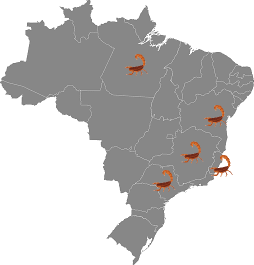

http://g1.globo.com/globo-news/noticia/2012/11/minas-gerais-e-o-estado-com-mais-casos-de-picada-de-escorpiao.html

Total de aplicações no Brasil. Percebe-se claramente que o número de aplicações sobe até 2013 e a partir desta data este índice diminui.
Hipótese:
1. Queda devido mais informações sobre os cuidados?
2. Falta de soro antiescorpiônico. Fonte: https://globoplay.globo.com/v/9156470/

Segundo publicação da Sociedade Brasileira de Medicina tropical, os números de casos vem aumentando de ano a ano, porém não é o que vemos no gráfico com a aplicação de soros. Tudo indica ser falta dos soros.
Fonte: https://www.sbmt.org.br/portal/accidents-with-scorpions-significant-increase-worries-authorities-and-population

Text(0.5, 1.0, 'Comportamento Anual das aplicações de soro antiescorpiônico no Brasil')

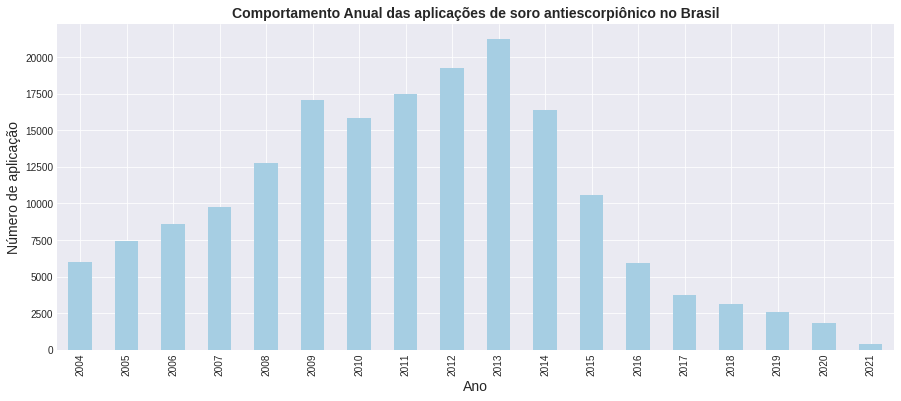

In [184]:
#selecionando as colunas e totalizando os valores por ano (visão Brasil) 
totais = dados_regiao_ano_ordenado_agrupado.T.index.tolist()
dados_brasil = dados_regiao_ano_ordenado_agrupado[totais].sum()
ax =dados_brasil.T.plot(figsize = (15,6), kind="bar")

#definindo os labels dos eixos e o título
plt.ylabel('Número de aplicação', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.title('Comportamento Anual das aplicações de soro antiescorpiônico no Brasil', fontsize = 14, fontweight = 'bold')

Abaixo vemos que Minas Gerais se destaca entre os estados com maior número de aplicações de soro antescorpiônico

##Unidades da Federação (Comportamento Anual)

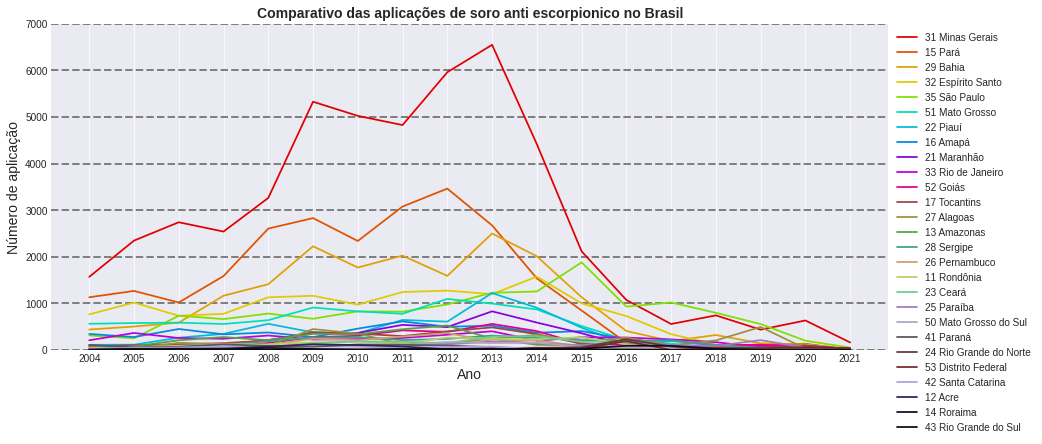

In [185]:
#selecionando os registros
plt.style.use('seaborn-darkgrid')
cinco_primeiros = dados_regiao_ano_ordenado_agrupado.index.to_list()
dados_regiao_cinco_primeiros = dados_regiao_ano_ordenado_agrupado.loc[cinco_primeiros]
ax = dados_regiao_cinco_primeiros.T.plot(color=colors2,kind='line', figsize=(15,6), linewidth=1.75)

#definindo a legenda
plt.legend(bbox_to_anchor=(1,1)) 

#inlcuir os títulos
plt.ylabel('Número de aplicação', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.title('Comparativo das aplicações de soro anti escorpionico no Brasil', fontsize = 14, fontweight = 'bold')


#definindo a paleta de cores
sns.set_palette(sns.color_palette("rainbow", 27))

#criando a grid
plt.grid(axis='y',color='gray',linestyle='--',linewidth=2)

eixo_x = dados_regiao_cinco_primeiros.T.index.tolist()
ax.set_xticks(range(len(eixo_x)))
ax.set_xticklabels(eixo_x)

#definindo o inicio e fim fo eixo y (garantindo que inicia em 0)
plt.ylim(0,7000)
plt.show()

Analisando os 5 estados com maior incidência de casos mais o estado do Alagoas, percebe-se que a partir de 2013 as aplicações de soro anti escorpiônico começam a cair. Somente
em São Paulo em 2015 tem um aumento significativo e depois volta a cair.
Hipóteses:
1. Está caindo devido a diminução de acidentes ou pela falta do soro?
2. Está caindo devido a melhores condições em infraestrutura (saneamento básico),combate a praga (erradicação da praga)?


#Unidades da Federação com mais Casos Registrados e Alagoas (Comportamento Anual)

(0.0, 7000.0)

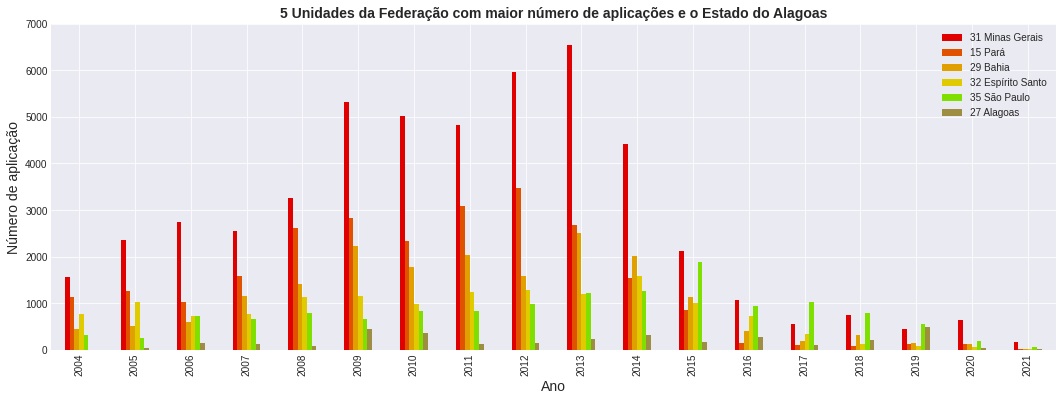

In [186]:
# selecionando as colunas para aparecer no eixo x
eixo_x = dados_regiao_ano_ordenado_agrupado.columns[:25].tolist()
eixo_x = [int(val) for val in eixo_x]

cinco_primeiros = dados_regiao_ano_ordenado_agrupado.index.to_list()[0:5]
cinco_primeiros.insert(6,"27 Alagoas")
dados_regiao_cinco_primeiros = dados_regiao_ano_ordenado_agrupado.loc[cinco_primeiros]
ax = dados_regiao_cinco_primeiros.T.plot(kind= "bar",figsize=(18,6), color=colors2, stacked= False)
plt.legend(bbox_to_anchor=(1,1)) 

#definindo os labels do eixo x
ax.set_xticks(range(len(eixo_x)))
ax.set_xticklabels(eixo_x)

#definindo os labels dos eixos e o título do gráfico
plt.ylabel('Número de aplicação', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.title('5 Unidades da Federação com maior número de aplicações e o Estado do Alagoas', fontsize = 14, fontweight = 'bold')

#garantindo que o gráfico iniciará do 0
plt.ylim(0,7000)

Vejamos a correlação com Minas gerais entre os outros 5 estados com maiores número de aplicações. Foi incluído também o estado do Alagoas, pois em 2019 este estado ultrapassa Minas Gerais

In [187]:
#gerando a correlação dos estados com Minas Gerais (maior índice)
correlacao_um_estado = (dados_regiao_cinco_primeiros / dados_regiao_cinco_primeiros.loc["31 Minas Gerais"])*100
correlacao_um_estado.style.background_gradient(cmap='coolwarm').set_precision(2)

Ano,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Estado,,,,,,,,,,,,,,,,,,
31 Minas Gerais,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
15 Pará,72.08,53.98,37.18,62.42,79.83,53.12,46.56,63.77,58.09,40.83,34.77,40.01,14.26,17.77,10.38,26.83,21.01,4.97
29 Bahia,27.92,21.43,21.38,45.81,43.24,41.76,35.21,41.95,26.67,38.17,45.51,53.52,37.93,34.11,43.26,32.80,18.80,8.07
32 Espírito Santo,48.63,43.33,26.78,30.54,34.63,21.83,19.39,25.75,21.37,18.28,35.64,47.24,67.75,60.86,15.50,17.89,8.69,6.83
35 São Paulo,19.89,10.65,26.78,26.09,23.94,12.58,16.48,17.03,16.39,18.74,28.41,88.80,86.67,182.94,107.41,127.52,31.28,31.06
27 Alagoas,0.00,1.32,5.62,4.84,2.76,8.41,6.99,2.61,2.30,3.70,7.31,8.08,24.70,18.13,27.63,113.07,4.90,4.35


São Paulo é um dos únicos estado que ultrapassa Minas Gerais na aplicação de Soro nos anos de 2017 a 2019.  A partir de 2011 percebe-se um aumento na aplicação de soros.

Segundo Rogério Bertani, pesquisador do Instituto Butantã, o aumento de casos está relacionado ao avanço do desmatamento e à capacidade de adaptação do animal. “O escorpião se urbanizou, se acostumou a viver ao redor do homem, principalmente nas periferias dos municípios. O escorpião amarelo, por exemplo, pode se reproduzir sem a necessidade do macho.” 

O grupo de pesquisa de Bertani documentou neste ano (2018) uma terceira espécie no Estado. “Verificamos que houve introdução de uma espécie típica do Nordeste, o Tytius stigmurus.” 

Minas Gerais semmpre manteve uma posição mais elevanda do que outro estados, mas em 2017 São Paulo chegou a marca de 82.94% acima de Minas Gerais

Leia mais em: https://vejasp.abril.com.br/cidades/sao-paulo-ataques-escorpiao-crescem-assustam-interior/

**Alagoas** também ultrapassa Minas Gerais em 2019, ficando com um índice de 13.07% acima.

https://www.gazetaweb.com/noticias/geral/mais-de-8-mil-pessoas-foram-vitimas-de-picadas-de-escorpiao-este-ano-em-alagoas/



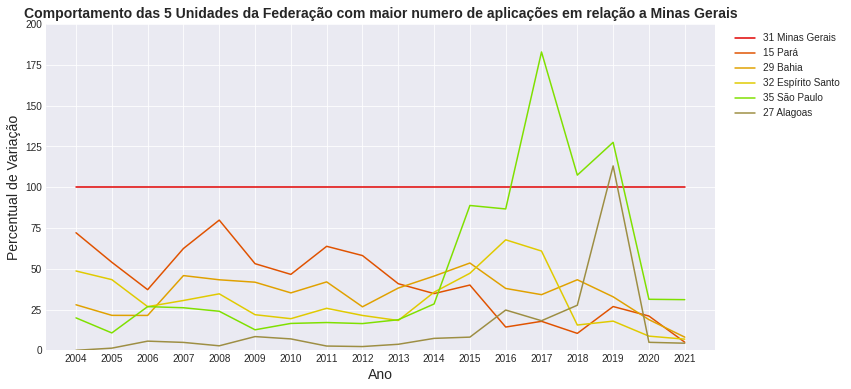

In [188]:
#Gerando a figura
ax = correlacao_um_estado.T.plot(color=colors2, figsize=(12,6))

#definindo o eixo x
ax.set_xticks(range(len(eixo_x)))
ax.set_xticklabels(eixo_x)

#posicionando a legenda
plt.legend(bbox_to_anchor=(1.2,1)) 

#definindo os labels dos eixos e do título
plt.ylabel('Percentual de Variação', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.title('Comportamento das 5 Unidades da Federação com maior numero de aplicações em relação a Minas Gerais', fontsize = 14, fontweight = 'bold')

#Definindo o limite de y
plt.ylim(0,200)
plt.show()

Correlacionando os outros cinco maiores estados e Alagoas com São Paulo, percebemos que Minas, Pará, Bahia e Espírito Santo, sempre estiveram acima de São Paulo, sendo que a partir de 2014 começam a cair gradativamente e São Paulo de 2016 a 2019 fica acima dos outros estados em relação a aplicação do soro antiescorpiônico.

In [189]:
#Gerando correlação entre os estados e São Paulo
correlacao_um_estado = (dados_regiao_cinco_primeiros / dados_regiao_cinco_primeiros.loc["35 São Paulo"])*100
correlacao_um_estado.style.background_gradient(cmap='coolwarm').set_precision(2)

Ano,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Estado,,,,,,,,,,,,,,,,,,
31 Minas Gerais,502.88,938.80,373.43,383.26,417.80,795.22,606.76,587.23,610.13,533.74,351.95,112.61,115.38,54.66,93.10,78.42,319.70,322.00
15 Pará,362.50,506.80,138.83,239.22,333.55,422.39,282.49,374.45,354.45,217.93,122.39,45.05,16.45,9.72,9.66,21.04,67.17,16.00
29 Bahia,140.38,201.20,79.84,175.57,180.67,332.09,213.65,246.35,162.74,203.75,160.16,60.27,43.76,18.65,40.28,25.72,60.10,26.00
32 Espírito Santo,244.55,406.80,100.00,117.04,144.69,173.58,117.63,151.22,130.40,97.56,125.42,53.19,78.17,33.27,14.43,14.03,27.78,22.00
35 São Paulo,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
27 Alagoas,0.00,12.40,20.98,18.55,11.52,66.87,42.39,15.33,14.02,19.72,25.74,9.10,28.49,9.91,25.72,88.67,15.66,14.00


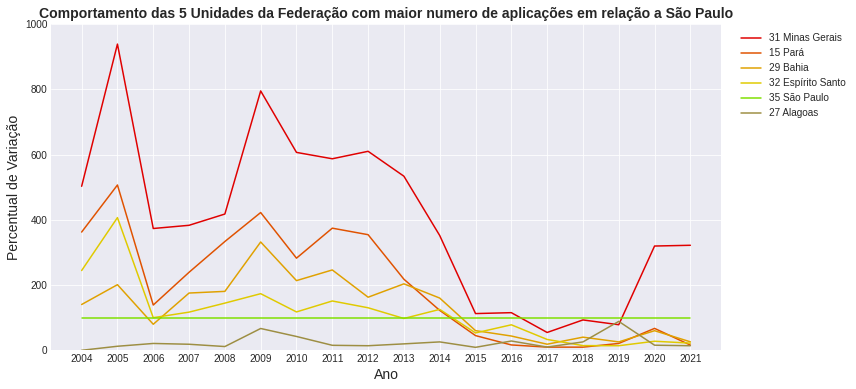

In [190]:
#imprimindo figura
ax = correlacao_um_estado.T.plot(color=colors2, figsize=(12,6))

#definindo os labels do eixo x
ax.set_xticks(range(len(eixo_x)))
ax.set_xticklabels(eixo_x)

#posicionando a legenda
plt.legend(bbox_to_anchor=(1.2,1))

#definindo os labels dos eixos e título
plt.ylabel('Percentual de Variação', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.title('Comportamento das 5 Unidades da Federação com maior numero de aplicações em relação a São Paulo', fontsize = 14, fontweight = 'bold')

#garantindo o limite de Y
plt.ylim(0,1000)
plt.show()

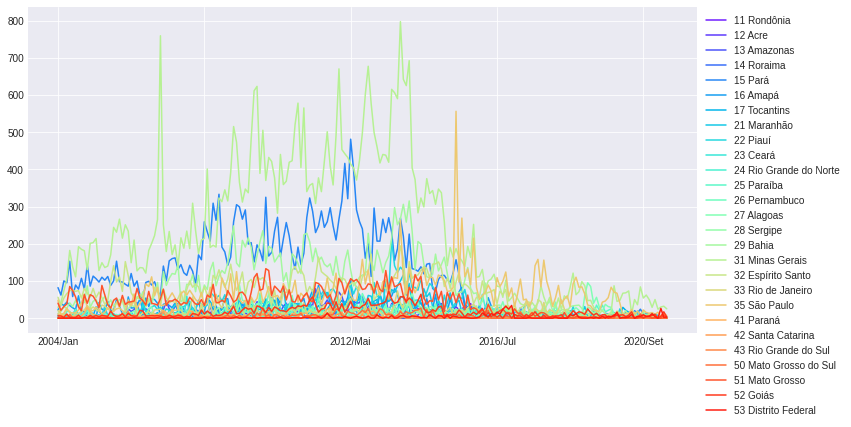

In [191]:
ax =dados_regiao_usaveis.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("icefire", 27))

(0.0, 800.0)

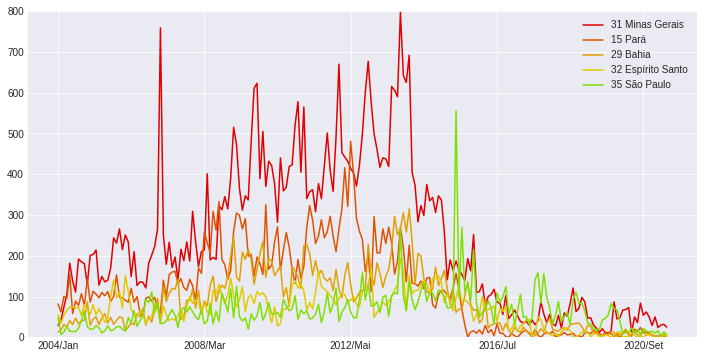

In [199]:
cinco_primeiros = dados_regiao_usaveis_max.index.to_list()[0:5]
dados_regiao_cinco_primeiros = dados_regiao_usaveis_max.loc[cinco_primeiros]
dados_regiao_cinco_primeiros.T.plot(figsize=(12,6), color=colors2)
ax=plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("Paired", 27))
plt.ylim(0,800)

(0.0, 800.0)

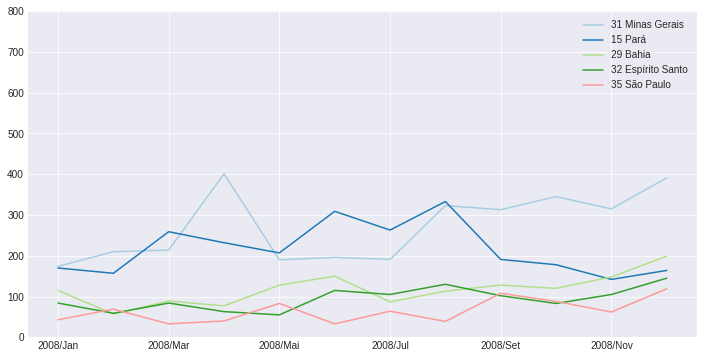

In [207]:
dados_regiao_cinco_primeiros_cortado = dados_regiao_cinco_primeiros[dados_regiao_cinco_primeiros.columns[48:60]]
ax = dados_regiao_cinco_primeiros_cortado.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("Paired", 27))
plt.ylim(0,800)

(0.0, 800.0)

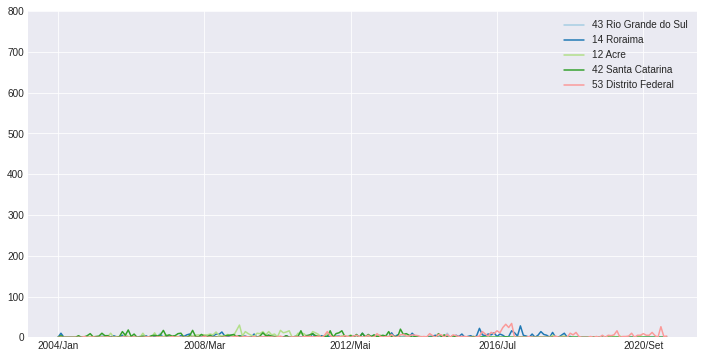

In [194]:
cinco_primeiros = dados_regiao_usaveis_min.index.to_list()[0:5]
dados_regiao_cinco_primeiros = dados_regiao_usaveis_max.loc[cinco_primeiros]
dados_regiao_cinco_primeiros.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("Paired", 27))
plt.ylim(0,800)

(0.0, 40.0)

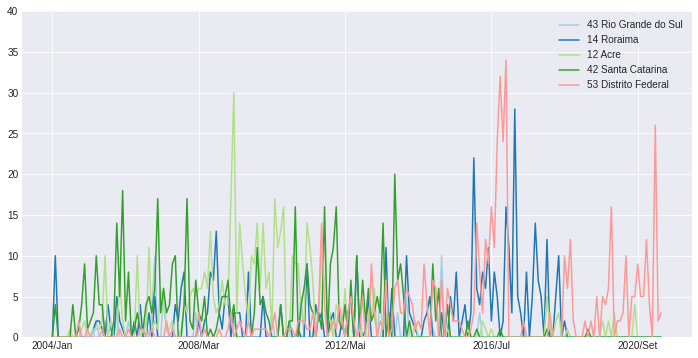

In [195]:
dados_regiao_cinco_primeiros.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("Paired", 27))
plt.ylim(0,40)